In [1]:
!pip install d2l

     |████████████████████████████████| 81kB 3.3MB/s 


In [2]:
import torch
from torch import nn
from d2l import torch as d2l

In [3]:
#4.3.1. 模型
#与softmax回归的简洁实现（ 3.7节）相比，唯一的区别是我们添加了2个全连接层（之前我们只添加了1个全连接层）。
#第一层是隐藏层，它包含256个隐藏单元并使用了ReLU激活函数。第二层是输出层。
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 256), nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

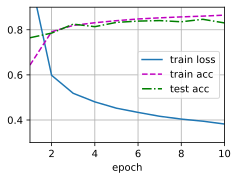

In [4]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)